# **Estadística Descriptiva**
###  Análisis del Dataset — Medidas de Tendencia Central, Dispersión y Distribución  
En este notebook realizamos un análisis estadístico del dataset cargado desde el repositorio.  
Incluye:

- Carga y descripción del dataset  
- Medidas de tendencia central  
- Medidas de dispersión  
- Detección de sesgo (asimetría)  
- Normalización de datos (Machine Learning)  
- Histogramas y boxplots  
- Interpretación completa  


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use('ggplot')


## **Carga del Dataset**  
Cargamos el archivo ubicado dentro de la carpeta **notebook** del repositorio.


In [17]:
import pandas as pd

url = "https://raw.githubusercontent.com/Dvargas-2001/Guia_Taller_1/main/notebook/dataset_sesgo_derecha.csv"

df = pd.read_csv(url)
df.head()


,valor
0,19.359580
1,12.479993
2,62.563092
3,63.853277
4,58.022004


## **Descripción del Dataset**  
Aquí observamos las primeras filas y revisamos la información básica del dataset.


In [19]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valor   200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


,count,mean,std,min,25%,50%,75%,max
valor,200.0,30.165024,15.501939,1.309692,18.519055,27.960464,41.247809,65.728013


## **Medidas de Tendencia Central**
Estas medidas nos permiten entender el comportamiento general de las variables numéricas:
- **Media**
- **Mediana**
- **Moda**


In [20]:
media = df.mean(numeric_only=True)
mediana = df.median(numeric_only=True)
moda = df.mode(numeric_only=True).iloc[0]

print("MEDIA:\n", media, "\n")
print("MEDIANA:\n", mediana, "\n")
print("MODA:\n", moda, "\n")


MEDIA:
 valor    30.165024
dtype: float64 

MEDIANA:
 valor    27.960464
dtype: float64 

MODA:
 valor    1.309692
Name: 0, dtype: float64 



## **Medidas de Dispersión**  
Permiten identificar qué tan separados están los datos:

- **Varianza**
- **Desviación Estándar**
- **Rango**
- **Coeficiente de Variación**


In [21]:
varianza = df.var(numeric_only=True)
desviacion = df.std(numeric_only=True)
rango = df.max(numeric_only=True) - df.min(numeric_only=True)
coef_variacion = (desviacion / media) * 100

print("VARIANZA:\n", varianza, "\n")
print("DESVIACIÓN:\n", desviacion, "\n")
print("RANGO:\n", rango, "\n")
print("COEFICIENTE DE VARIACIÓN (%):\n", coef_variacion, "\n")


VARIANZA:
 valor    240.310128
dtype: float64 

DESVIACIÓN:
 valor    15.501939
dtype: float64 

RANGO:
 valor    64.418322
dtype: float64 

COEFICIENTE DE VARIACIÓN (%):
 valor    51.390443
dtype: float64 



## **Análisis de Sesgo (Asimetría)**
Verificamos si la distribución está:

- **Sesgo a la izquierda** (cola larga izquierda)  
- **Sesgo a la derecha** (cola larga derecha)  
- **Distribución simétrica**  


In [22]:
asimetria = df.skew(numeric_only=True)
asimetria


,0
valor,0.443377


# **Visualización de Datos**  
Incluimos histogramas y boxplots para entender:  
- Distribuciones  
- Sesgo  
- Valores atípicos  

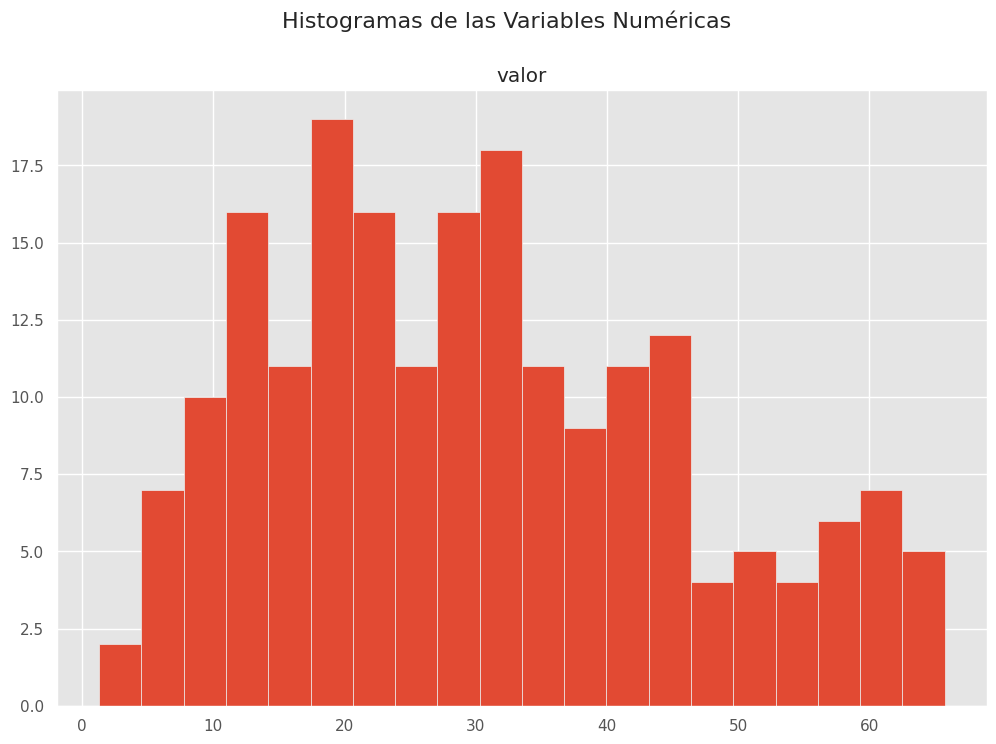

In [23]:
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histogramas de las Variables Numéricas", fontsize=16)
plt.show()


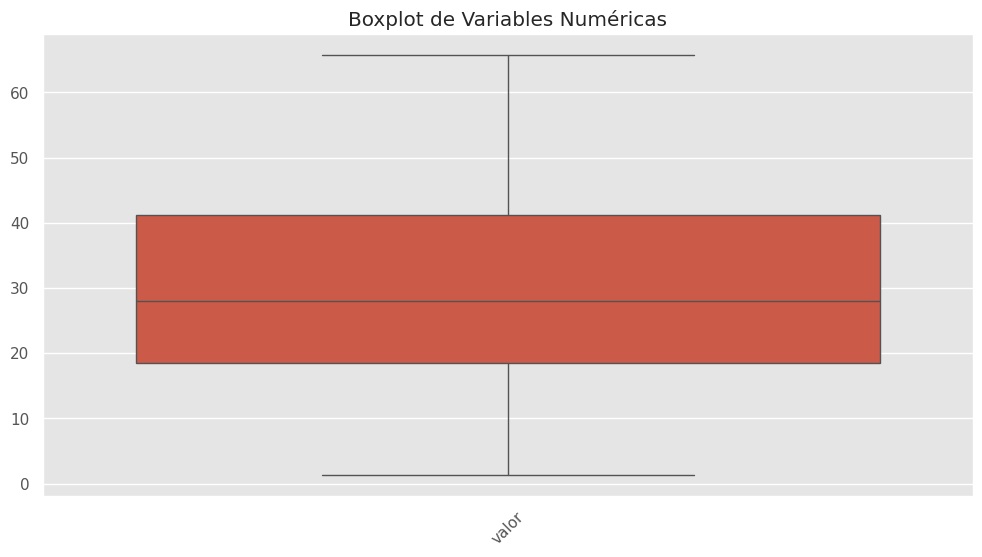

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot de Variables Numéricas")
plt.xticks(rotation=45)
plt.show()


#  **Normalización para Machine Learning**  
Los algoritmos de Machine Learning **NO pueden trabajar con escalas diferentes**,  
por eso se usa:

### 🔹 Min-Max Scaling (0–1)  
### 🔹 Z-Score (Estandarización)

Aplicamos ambas.


In [25]:
numericas = df.select_dtypes(include='number')

scaler_minmax = MinMaxScaler()
norm_minmax = scaler_minmax.fit_transform(numericas)

scaler_z = StandardScaler()
norm_z = scaler_z.fit_transform(numericas)

print("MinMax Scaling (primeras filas):\n", norm_minmax[:5], "\n")
print("Z-Score (primeras filas):\n", norm_z[:5])


MinMax Scaling (primeras filas):
 [[0.28019806]
 [0.17340255]
 [0.95086924]
 [0.97089747]
 [0.8803755 ]] 

Z-Score (primeras filas):
 [[-0.69878736]
 [-1.1436898 ]
 [ 2.09518094]
 [ 2.17861711]
 [ 1.80150904]]


# **Conclusiones**
- Se analizaron las medidas de tendencia central y dispersión del dataset.  
- Identificamos el tipo de sesgo en cada variable.  
- Graficamos histogramas y boxplots para interpretar la distribución.  
- Normalizamos las variables para prepararlas para futuros modelos de Machine Learning.  
